#Análisis de Supervivencia

**¿Qué es?**

Generalmente, el análisis de supervivencia se entiende como un conjunto de aproximaciones estadísticas para analizar datos cuya variable de interés es el tiempo hasta que sucede un evento. 
  
  Intenta responder a preguntas del tipo: ¿Qué tanto tiempo pasará hasta que suceda un evento? 

**¿Cómo se orginó?**

Sus orígenes se remontan desde 1600 con la construcción básica de tablas de vida. Es hasta 1980 que se generan nuevos avances en el análisis moderno de supervivencia. 

**¿Para qué sirve?**

- Estimar esperanza de vida
- Estimar cuando una máquina va a dejar de funcionar (análisis de fiabilidad)
- Retención de usuarios. 
- Tasa de supervivencia después de un diágnostico. 
- El riesgo de una población de morir en un periodo de tiempo. 

## Conceptos Básicos 

*Tiempo*
    
  Se refiere a años, meses, semanas, días y minutos del inicio del seguimiento hasta que un evento ocurra. También se puede referir a la edad de un individuo cuando el evento ocurre. 

> Tiempo = tiempo de supervivencia $(T \geq 0) $ | debe ser una variable aleatoria continua. 
  
  Nos dice el tiempo que un sujeto ha 'sobrevivido' durante un periodo de seguimiento. 

*Evento*

En principio puede ser cualquier suceso de interés que se defina en el análisis. Puede ser la muerte de un paciente, padecer una enfermedad o la recuperación, la falla de una maquinaria, cuando un cliente deja de utilizar un servicio o retención de una página web. 

> Evento = fallo | básicamente se refiere a cuando la característica que se quiere medir deja de suceder. No necesariamente se define en términos de perdida. 

Se asume que el evento sucede una una vez. Pero sí se puede modelar eventos recurrentes o riesgos competidos (competing risks). 

*Datos Censurados*

Cuando se tiene información acerca del tiempo de supervivencia de un individuo pero no hasta cuando sucedió el evento de interés. 

Hay tres tipos de censura:
  
*   Derecha: el sujeto sigue vivo o no ha presentado el evento de interés durante la medición. 
*   Izquierda: en este caso puede ser que el evento haya sucedido antes del experimento o análisis. 
*   Por intervalos: tenemos información de un intervalo en específico así que es posible que el evento de interés no ocurra en el intervalo. 

Esto puede sucer por:

1. El sujeto no experimenta el evento durante el tiempo del análisis o estudio. 
2. Se deja de dar seguimiento al sujeto. 
3. La persona abandona o no es posible darle seguimiento por algún otro evento distinto al que se está midiendo. 
4. Puede que estemos limitados por los datos que tenemos. 



**El análisis de supervivencia toma en cuenta esta información para modelar la curva de supervivencia.**


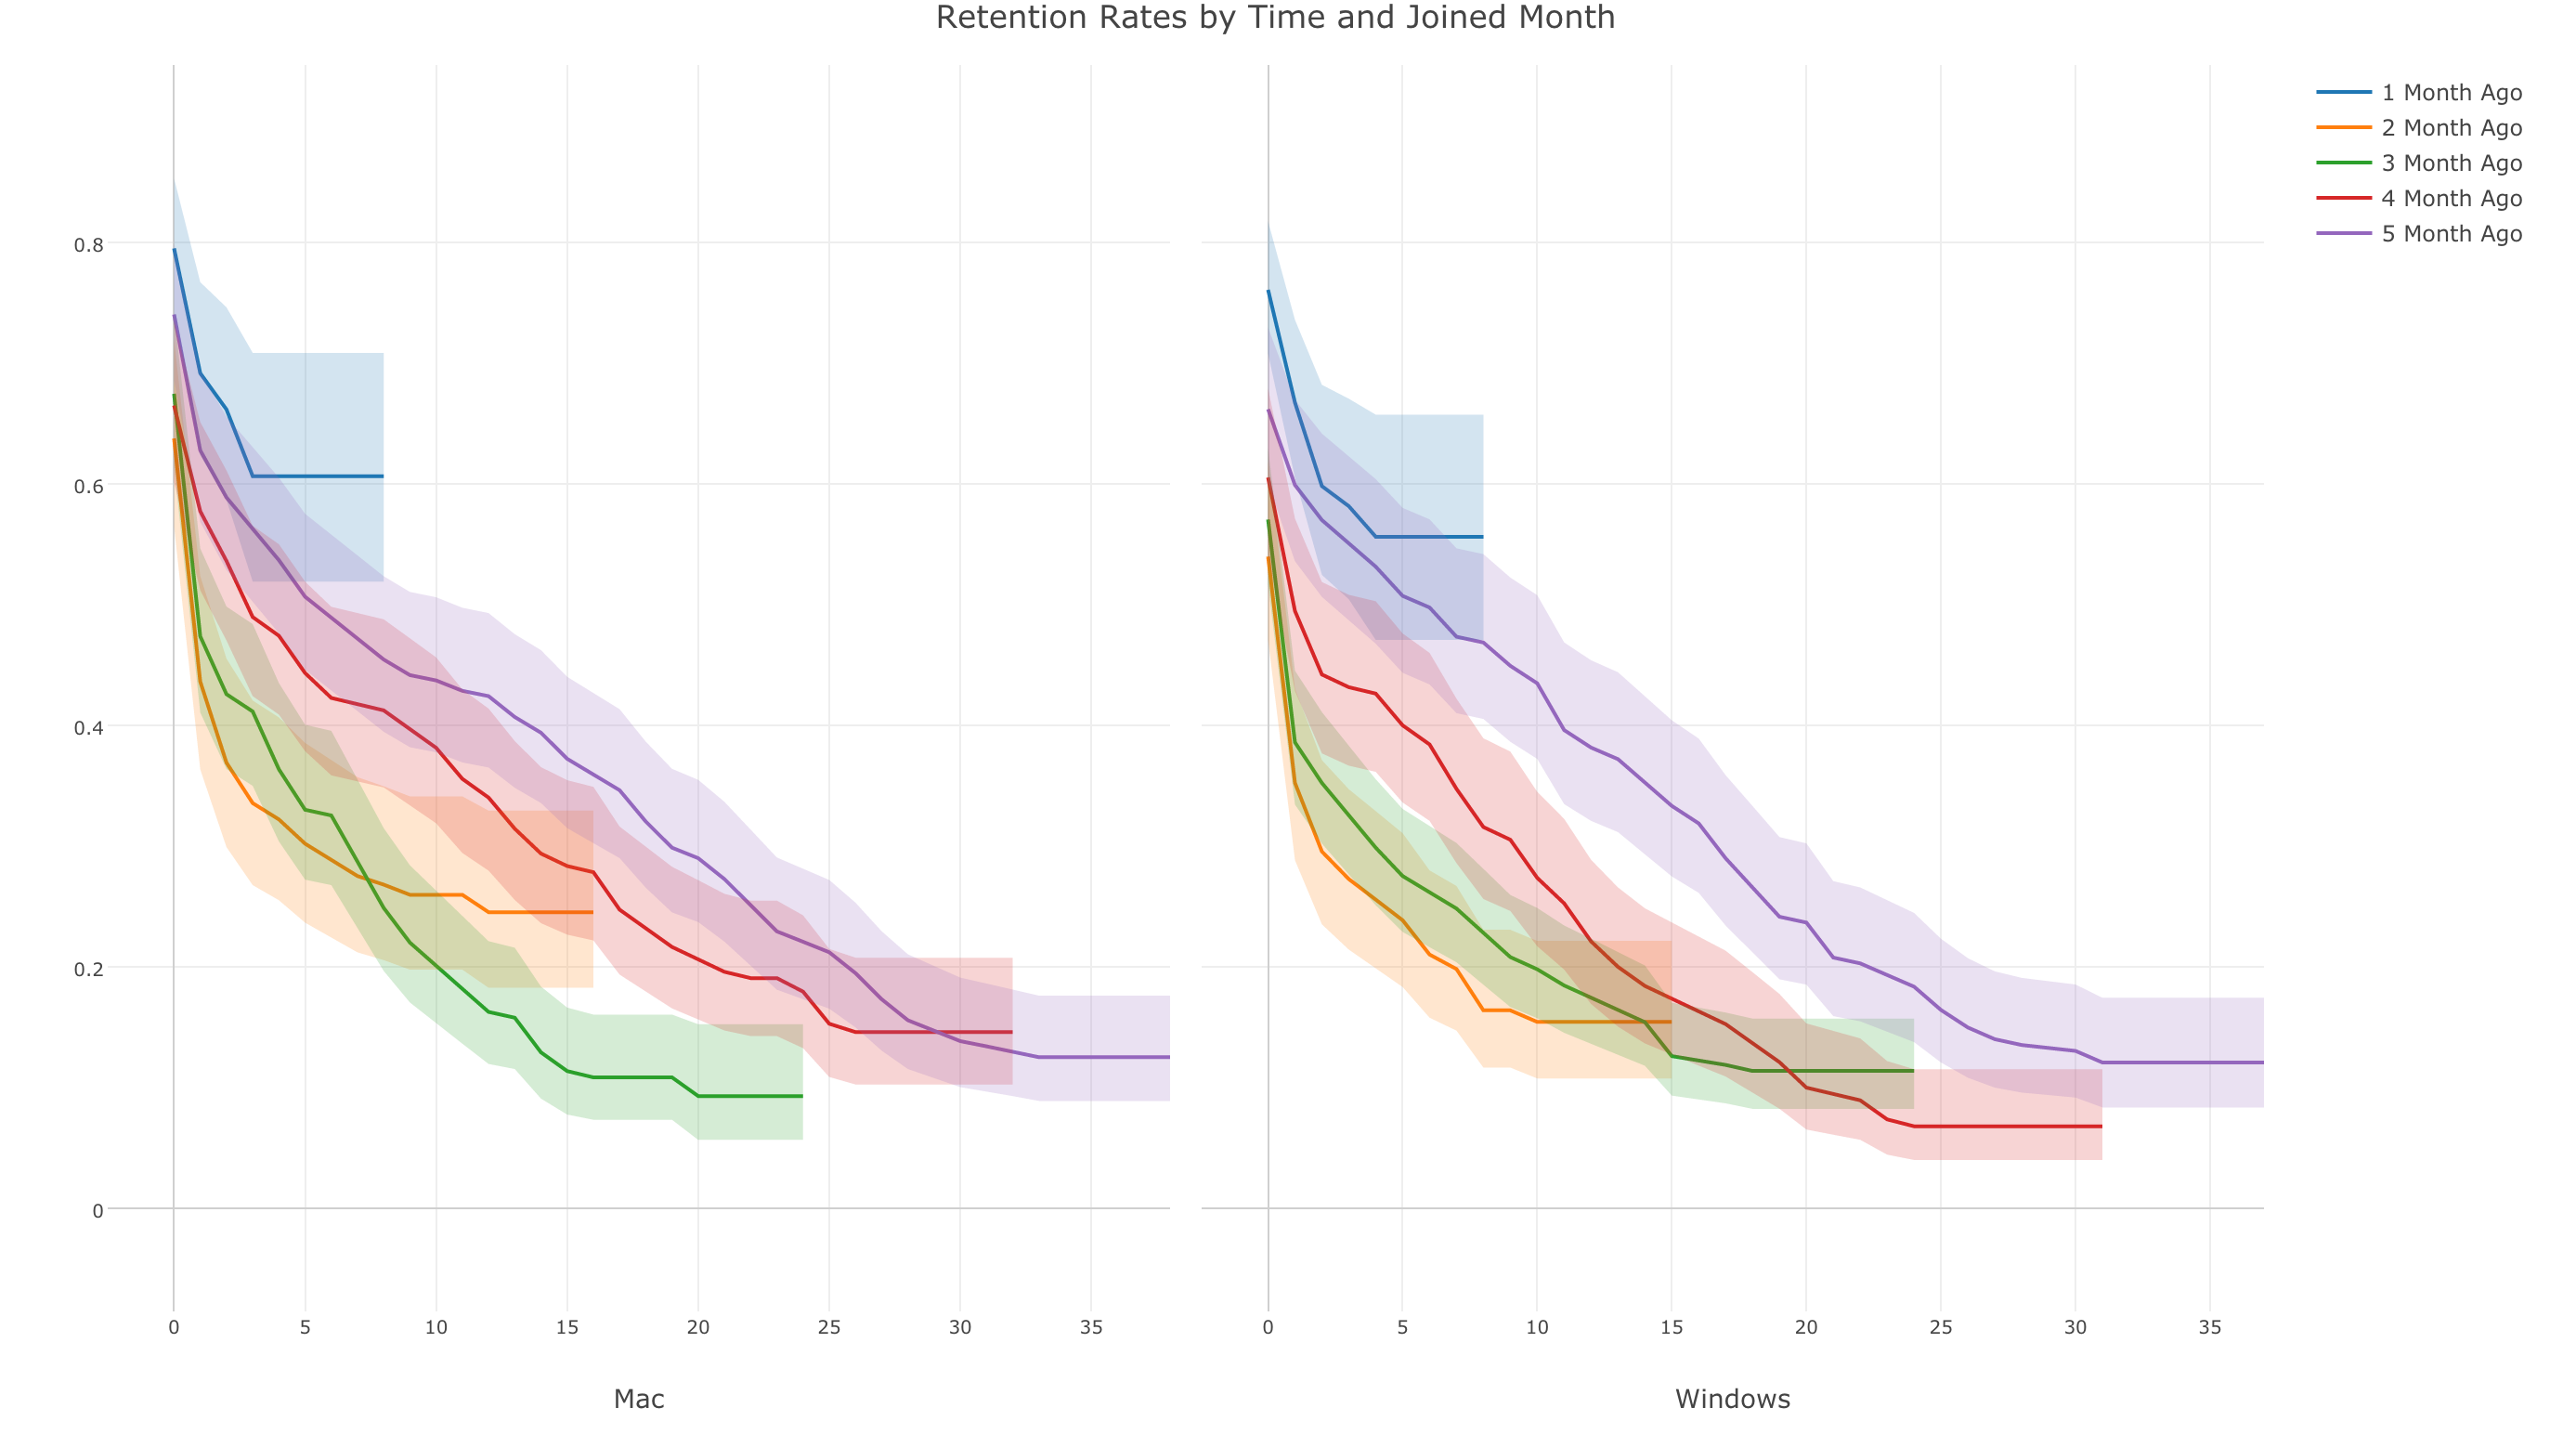

**Por lo tanto, para nuestros datos requerimos tres aspectos básicos:**

1. Una variable de tiempo. 
2. Una variable que mida si sucede el evento de interés o no. 
3. Una variable que muestre una característica por la cual agrupar, es decir, variables que expliquen el evento. 

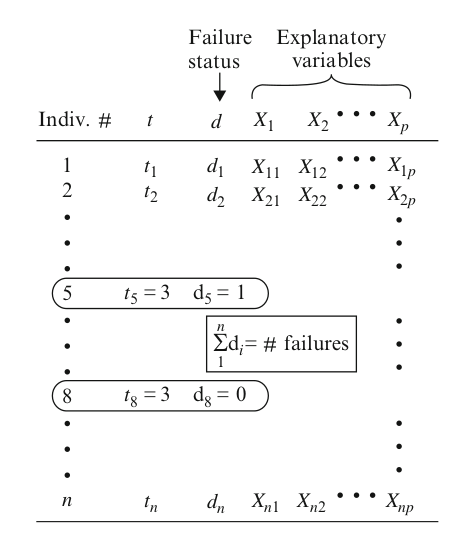

### Nomenclatura básica 

T = tiempo de supervivencia $(T \geq 0)  $

t = valor específico de t

d = (0, 1) fallo o censura 

$
d = \left\{
    \begin{array}\\
        1 & \mbox{si fallo } \\
        0 & \mbox{censura } \\
    \end{array}
\right.
$

$ S(t) = \text{funcion de supervivencia} $

$ h(t) = \text{funcion de riesgo}$

\
$$ S(t) = P(T \gt t)$$
Nos dice la probabilidad de que un sujeto sobreviva más que cierto periodo de tiempo específico $(t)$. Esto es: la probabilidad que la variable aleatoria $T$ exceda el tiempo específica $t$.


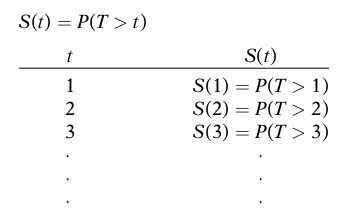

Teóricamente, como $t$ puede tomar valores de 0 a $\infty$ la función de supervivencia puede ser graficada como una curva suave.

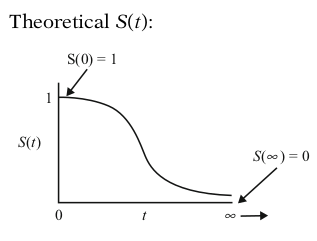

**Características**

* Son no-crescientes, disminuyten según $t$ aumenta. 
* En el tiempo $ t = 0, \ S(t) = S(0) = 1. \ $ En el momento  de inicio del estudio nadie presenta el evento.
* En el tiempo $ t = \infty, \ S(t) = S(\infty) = 0. \ $ Teóricamente si el experimento continúa sin límite eventualemente nadie 'sobrevivirá', luego la curva de caer a cero. 

---
### Función de Riesgo

La función de riesgo $h(t)$ nos da el **potencial instantáneo por unidad de tiempo para que el evento ocurra, dado que el sujeto ha sobrevidido hasta el tiempo $t$.**

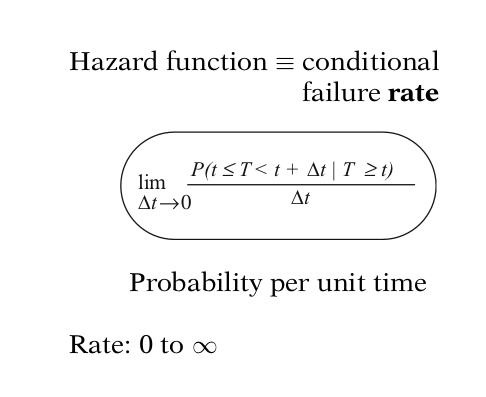

La función de riesgo a diferencia de la función de supervivencia se concentra en el fallo, es decir que el evento ocurra. Por lo tanto, se puede considerar en cierto sentido que nos da la información contraria a la función de supervivencia. 

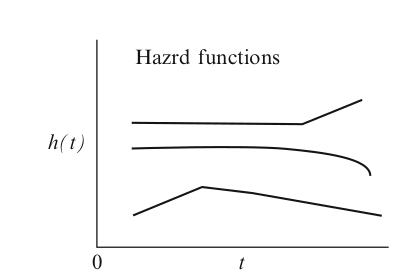

**Características de la función de riesgo**

* No tiene que inciar en 1 e ir hasta 0. 
* siempre es no-negativa.
* No tiene límite superior. 

#### Tienen que saber que ambas funciones están relacionadas; de hecho si conoces una entonces puedes derivar la otra.

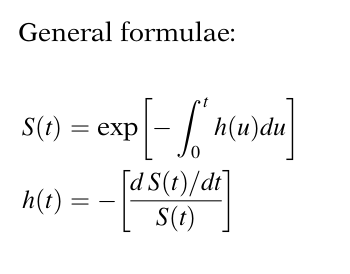

## Kaplan-Meier estimator

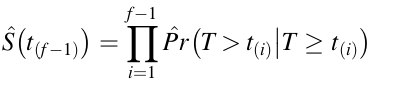

Supuestos:
- Los sujetos censurados tienen las mismas perspectivas de supervivencia que los que siguen siendo seguidos.
- La probabilidad de supervivencia es la misma para todos los sujetos, independientemente de cuándo sean reclutados en el estudio.
- El evento de interés ocurre a la hora especificada. Esto se debe a que el evento puede ocurrir entre dos exámenes. El tiempo de supervivencia estimado se puede medir con mayor precisión si el examen se realiza con frecuencia, es decir, si el intervalo de tiempo entre exámenes es muy pequeño.

## Cox Proportional Hazard Model

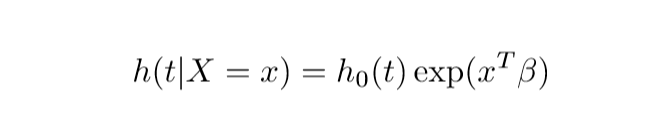

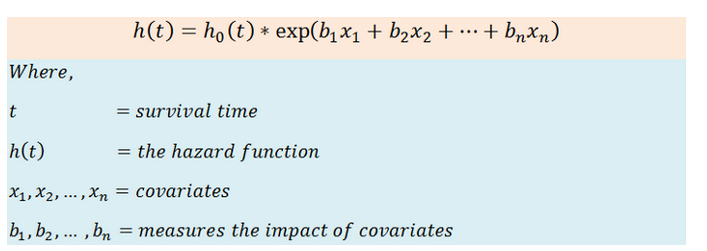

In [1]:
pip install lifelines

     |████████████████████████████████| 358kB 30.5MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4050 sha256=e1a20ada7e3212f86cccd2b0ebd0e102a1ab983dc82a75277100e48781b95179
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [2]:
!pip install plotly==4.14.3

     |████████████████████████████████| 13.2MB 222kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [5]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
pd.options.plotting.backend = 'plotly'

In [9]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [13]:
df = pd.read_csv('/drive/MyDrive/datasets/churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low,Very Low,New,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Low,Moderate,Loyal,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low,Very Low,New,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low,Moderate,Loyal,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moderate,Very Low,New,1.0


In [25]:
group_1 = df[df['gender']=='Female']
group_2 = df[df['gender']=='Male']

T = group_1['tenure']
E = group_1['ChurnBinary']
model = KaplanMeierFitter()
model.fit(T, E, label = 'Female')

<lifelines.KaplanMeierFitter:"Female", fitted with 3483 total observations, 2544 right-censored observations>

In [26]:
sns.set(context ='paper', style='darkgrid', rc= {'figure.figsize':(20,10)})
fig_1 = model.survival_function_

T_2 = group_2['tenure']
E_2 = group_2['ChurnBinary']
model.fit(T_2, E_2, label ='Male')
fig_2 = model.survival_function_
figure = pd.concat([fig_1,fig_2],axis=1)
figure.plot()

In [27]:
# Logrank test nos permite ver la relacion de peso para nuestro evento
# H0 es que nuestras 2 variables son similares, es decir el genero no afecta 
results = logrank_test(T, T_2, E,E_2)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09

In [30]:
def survival(data, group_field, time_field, event_field):
  model = KaplanMeierFitter()
  results = []
  con_exp = []
  # Entrenar nuestro modelo
  for i in data[group_field].unique():
    group = data[data[group_field] == i]
    T = group[time_field]
    E = group[event_field]
    con_exp.append([T,E])
    model.fit(T,E, label = str(i))
    results.append(model.survival_function_)
  
  survival = pd.concat(results,axis = 1)
  log_result = logrank_test( con_exp[0][0],con_exp[1][0],con_exp[0][1],con_exp[1][1])
  
  return survival, log_result

In [33]:
rates, logrank = survival(df,'gender','tenure','ChurnBinary')
print(logrank)

rates.plot( kind='line', title='retencion por antiguedad y genero',labels = dict( values= 'Tenure (Month)', index ='Retention Rate'))

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09


In [34]:
rates, logrank = survival(df,'InternetService','tenure','ChurnBinary')
print(logrank)

rates.plot( kind='line', title='retencion por antiguedad y servicio de internet ',labels = dict( values= 'Tenure (Month)', index ='Retention Rate'))

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         227.17 <0.005    168.12


In [35]:
rates, logrank = survival(df,'Contract','tenure','ChurnBinary')
print(logrank)

rates.plot( kind='line', title='retencion por antiguedad y contrato',labels = dict( values= 'Tenure (Month)', index ='Retention Rate'))

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         926.06 <0.005    673.27
